<a href="https://colab.research.google.com/github/fridymandita/Struktur-Data/blob/main/Travelling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Traveling Salesman Problem **

In [1]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])


# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

# **Import csv with Longitude and Latitude of  the capitals**

https://github.com/Albina1810/tsp/blob/master/cities50.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving cities50.csv to cities50.csv


In [4]:
import pandas as pd
cities2= pd.read_csv("cities50.csv")
cities2.head(6)

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856


# **Converting Longitude and Latitude into Cartesian X and Y**

** R of earth =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html

In [5]:
from math import radians,cos,sin

lat =cities2["latitude"].map(radians)
lon = cities2["longitude"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

cities2["lat_radians"] = lat
cities2["lon_radians"] = lon
cities2["x"] = x
cities2["y"] = y
cities2.head()

,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,Alabama,Montgomery,32.377716,-86.300568,0.565098,-1.506229,347.165470,220.128552
1,Alaska,Juneau,58.301598,-134.420212,1.017555,-2.346075,-2343.056680,-3793.968746
2,Arizona,Phoenix,33.448143,-112.096962,0.583780,-1.956461,-1999.696985,-1320.969349
3,Arkansas,Little Rock,34.746613,-92.288986,0.606443,-1.610747,-209.081510,-145.026698
4,California,Sacramento,38.576668,-121.493629,0.673290,-2.120464,-2601.928590,-2075.358090


In [6]:
cities = cities2.drop(["name", "description","latitude", "longitude", "lat_radians", "lon_radians"], 1)
cities.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,x,y
0,347.165470,220.128552
1,-2343.056680,-3793.968746
2,-1999.696985,-1320.969349
3,-209.081510,-145.026698
4,-2601.928590,-2075.358090
5,-1266.718504,-1053.115801


In [7]:
df = cities.copy()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])

In [9]:
cities = np.asarray(cities)

In [10]:
scaled = np.asarray(scaled_df)

In [11]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(scaled,0.001)
route

array([ 0,  9, 10, 39, 31, 45, 19,  7, 29,  6, 38, 20, 18, 28, 44, 33, 37,
       47, 34, 21, 16, 13, 41, 48, 17,  3, 42, 35, 49,  5, 30,  2, 43, 27,
        4,  8,  1, 46, 36, 11, 25, 32, 40, 26, 15, 14, 22, 24, 23, 12])

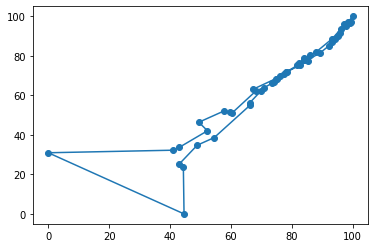

Route: [ 0  9 10 39 31 45 19  7 29  6 38 20 18 28 44 33 37 47 34 21 16 13 41 48
 17  3 42 35 49  5 30  2 43 27  4  8  1 46 36 11 25 32 40 26 15 14 22 24
 23 12]

Distance_scaled: 315.8765978025802


In [12]:
#PLOT IN CARTESIAN 


import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([scaled[route[i]] for i in range(len(route))]),np.array([scaled[0]])))
# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance_scaled: " + str(path_distance(route,scaled)))

In [13]:
#unit of scale = ()Max (Lng or Lat) - Min(Lng or Lat)) /100
#unit of scale = 53.31km

Distance_km = path_distance(route,scaled) * 53.31
Distance_km

16839.38142885555

THUS, Distance is 16,839 km

In [14]:
order = pd.DataFrame(route, columns=["index"])
cities2["index"] = cities2.index
cities2
travel=order.merge(cities2, on = "index")

In [15]:
start= travel[0:1]
loop = travel.append(start)
loop

,index,name,description,latitude,longitude,lat_radians,lon_radians,x,y
0,0,Alabama,Montgomery,32.377716,-86.300568,0.565098,-1.506229,347.165470,220.128552
1,9,Florida,Tallahassee,30.438118,-84.281296,0.531245,-1.470986,547.340539,321.612456
2,10,Georgia,Atlanta<br>,33.749027,-84.388229,0.589032,-1.472852,518.014165,346.113275
3,39,South Carolina,Columbia,34.000343,-81.033211,0.593418,-1.414296,823.227985,555.281457
4,31,North Carolina,Raleigh,35.780430,-78.639099,0.624486,-1.372511,1018.146153,733.781645
5,45,Virginia,Richmond,37.538857,-77.433640,0.655177,-1.351472,1099.126150,844.574072
6,19,Maryland,Annapolis,38.978764,-76.490936,0.680308,-1.335019,1156.942631,936.163885
7,7,Delaware,Dover,39.157307,-75.519722,0.683424,-1.318068,1235.273492,1005.932711
8,29,New Jersey,Trenton,40.220596,-74.769913,0.701982,-1.304981,1277.927754,1080.720351
9,6,Connecticut,Hartford<br>,41.764046,-72.682198,0.728920,-1.268544,1414.562207,1263.168205


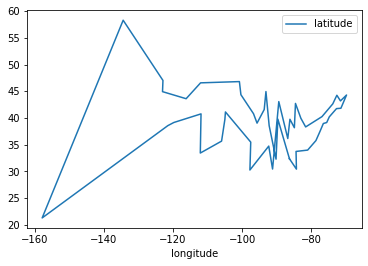

In [16]:
#PLOT IN LONGITUDE AND LATITUDE

loop.plot(kind="line", x="longitude", y="latitude")

In [17]:
#WRITING CSV FILE WITH route

tsp = loop[["latitude", "longitude"]]

tsp.to_csv('tsp.csv', index=False)

from google.colab import files
files.download("tsp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

upload csv file with latitude and longitude here for visualization: http://www.gpsvisualizer.com/draw/ 